<a href="https://colab.research.google.com/github/Egg-Lord/CCADMACL_EXERCISES/blob/main/exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [1]:
import pandas as pd

from sklearn.cluster import KMeans

In [2]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [3]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [5]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [8]:
print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [6]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [9]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [38]:
Features = df[['AnnualIncome', 'SpendingScore']]
Features.columns = ['Annual Income (k$)', 'Spending Score (1-100)']

Display the first 10 rows. `(5 pts)`

In [39]:
Features.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

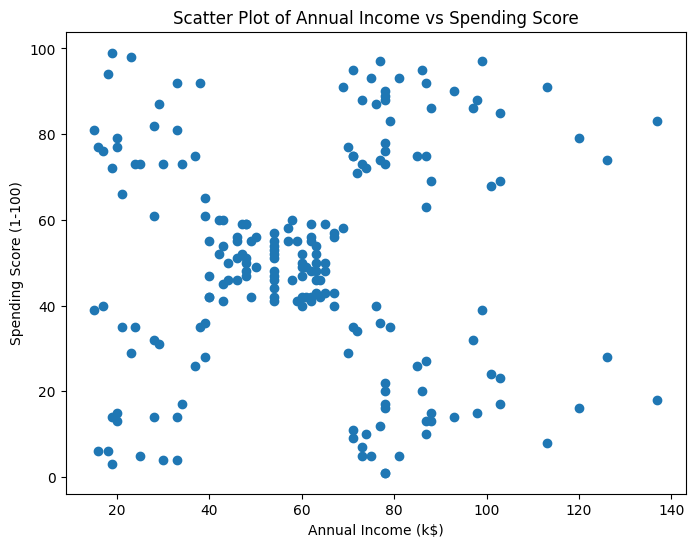

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(Features['Annual Income (k$)'], Features['Spending Score (1-100)'])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.title('Scatter Plot of Annual Income vs Spending Score')

plt.show()


## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, WCSS = 269981.28000000014
For cluster = 2, WCSS = 181363.59595959607
For cluster = 3, WCSS = 106348.37306211119
For cluster = 4, WCSS = 73679.78903948837
For cluster = 5, WCSS = 44448.45544793369
For cluster = 6, WCSS = 37265.86520484345
For cluster = 7, WCSS = 30259.657207285458
For cluster = 8, WCSS = 25050.832307547524
For cluster = 9, WCSS = 21862.09267218289
For cluster = 10, WCSS = 19657.783608703947


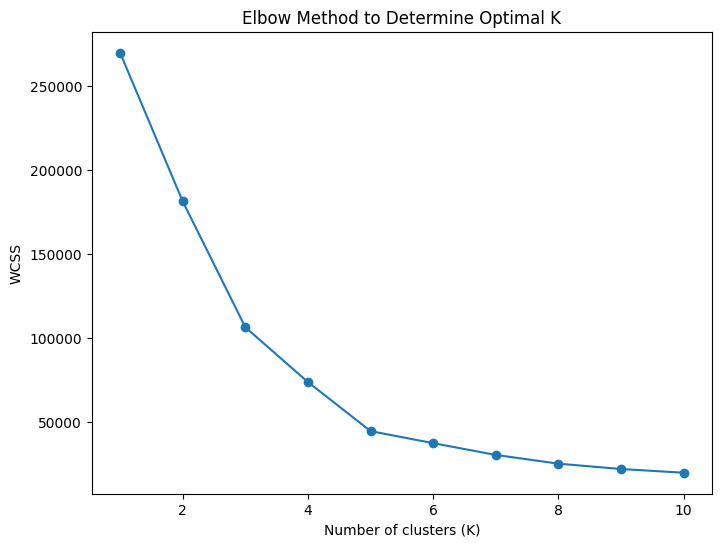

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0
    )
    kmeans.fit(Features)
    wcss.append(kmeans.inertia_)
    print(f"For cluster = {k}, WCSS = {kmeans.inertia_}")

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [42]:
cluster_Kmeans = KMeans(n_clusters=5,)
cluster_Kmeans.fit(Features)
Features['Cluster'] = cluster_Kmeans.labels_
Features.head(10)


/tmp/ipython-input-53404739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features['Cluster'] = cluster_Kmeans.labels_


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
5,17,76,4
6,18,6,2
7,18,94,4
8,19,3,2
9,19,72,4


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

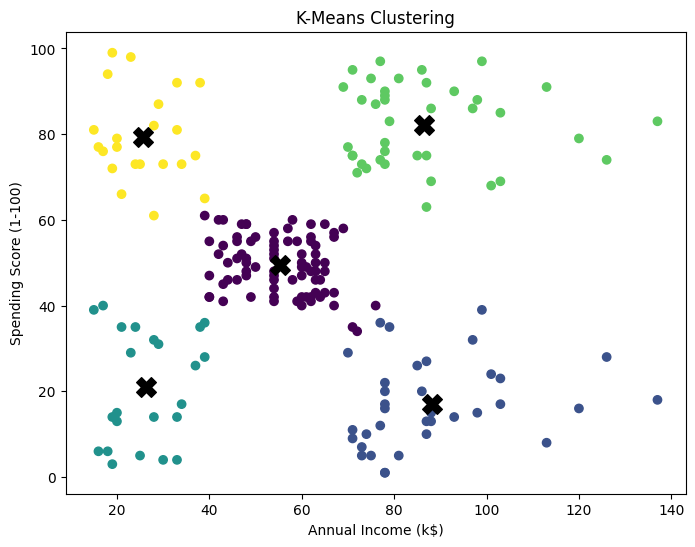

In [48]:
plt.figure(figsize=(8,6))

plt.scatter(Features['Annual Income (k$)'],
            Features['Spending Score (1-100)'],
            c=Features['Cluster'], cmap='viridis')

plt.scatter(cluster_Kmeans.cluster_centers_[:, 0],
            cluster_Kmeans.cluster_centers_[:, 1],
            marker='X',
            s=200,
            c='black')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

In [ ]:
"""
1. The bottom right (dark blue) cluster represents the high income, low spending users.
2. The top left (yellow cluser) cluster represents the low income, high spending users.
3. The middle (purple) cluster might represent target customers for promotions because of its balanced Income and Spending as well as its high density.
4. It is better to target the middle class as they have the balanced income and spending behavior making them consistent customer so deals and promotions should tailor
to them for better business opportunities.

"""

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [60]:
Features2 = df[['Age', 'AnnualIncome', 'SpendingScore']]
Features2.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Features2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Visualize using a 3D scatter plot. `(5 pts)`

In [61]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans

fig = px.scatter_3d(df, x='Age', y='AnnualIncome', z='SpendingScore', color=pred_kmeans)
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

In [ ]:
"""
1. the middle (yellow) cluster has the most balanced customer with their high density, average spending and annual income.
There is also the top right (purple) Cluster which has good density with high income and very high spending making them good target customer.

2. The majority of the yellow and purple clusters the majority of them are mainlly
aged 20-35 so it is best to promote products that is appropriate for their age and the rest are aged 36-70.

"""